In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv("../Stuff/city_data.csv")
ride_data_df = pd.read_csv("../Stuff/ride_data.csv")

# Combine the data into a single dataset

city_ride = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')

# Display the data table for preview
city_ride.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
city_ride.groupby('city')
ride = city_ride.groupby('city').ride_id.count()
fare = city_ride.groupby('city').fare.mean()
type = city_ride.groupby('city').type
#df = pd.merge(ride, fare, how='outer', on='city')
df1 = pd.concat([ride, fare],axis=1)
df3 = pd.merge(df1, city_ride, how='outer', on='city')
type = city_ride.groupby('city').type.max() 
driver = city_ride.groupby('city').driver_count.max()
driver
df5 = pd.concat([df1, type],axis=1)
df6 = pd.concat([df5, driver],axis=1)

df7 = df6.loc[df6['type'] == "Urban"]
df8 = df6.loc[df6['type'] == "Suburban"]
df9 = df6.loc[df6['type'] == "Rural"]



## Bubble Plot of Ride Sharing Data

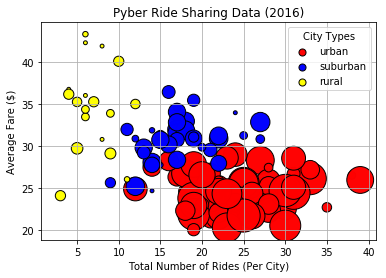

In [3]:
# Obtain the x and y coordinates for each of the three city types

x = df7['ride_id']
y = df7['fare']
z = df7['driver_count']

x1 = df8['ride_id']
y1 = df8['fare']
z1 = df8['driver_count']

x2 = df9['ride_id']
y2 = df9['fare']
z2 = df9['driver_count']

# Build the scatter plots for each city types

urban = plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black",s=z*15, alpha=0.99,label="urban" )
suburban = plt.scatter(x1, y1, marker="o", facecolors="blue", edgecolors="black",s=z1*15, alpha=0.99,label="suburban" )
rural = plt.scatter(x2, y2, marker="o", facecolors="yellow", edgecolors="black",s=z2*15, alpha=0.99,label="rural")
                    


# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()


# Create a legend

lgnd = plt.legend(handles=[urban, suburban, rural], loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.show()
# Icorporate a text label regarding circle size


# save figure


In [4]:
 # Show plot
plt.show()

## Total Fares by City Type

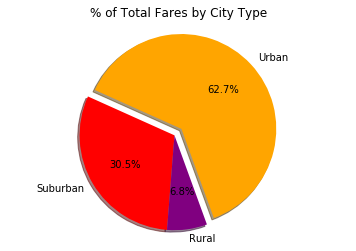

In [5]:
# Calculate Type Percents

df10 = city_ride.groupby('type').fare.sum()
df10 
df11 = city_ride.fare.sum()
#urban1 = [df10.at(1, 2)]
#sub1 = [df10.at(2, 2)]
#rur1 = [df10.at(3, 3)]
df22 = df10.loc['Urban']
df23 = df10.loc['Suburban']
df24 = df10.loc['Rural']

urban_percent = (df22/df11)*100
sur_percent = (df23/df11)*100
ru_percent =  (df24/df11)*100

colors = ["orange","red","purple"]

type = ["Urban", "Suburban", "Rural"]


explode = (0.1,0,0)

# Build Pie Chart
y = [urban_percent,
sur_percent,
ru_percent]

plt.pie(y, explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)


plt.axis("equal")

plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure


In [6]:
# Show Figure

## Total Rides by City Type

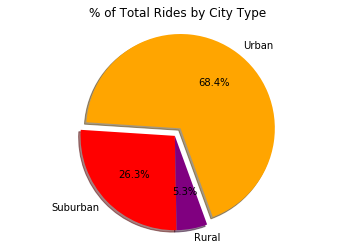

In [7]:
# Calculate Ride Percents
df30 = city_ride.groupby('type').ride_id.count()
df35 = city_ride.ride_id.count()
df31 = df30.loc['Urban']
df32 = df30.loc['Suburban']
df33 = df30.loc['Rural']

urban_percentr = (df31/df35)*100
sur_percentr = (df32/df35)*100
ru_percentr =  (df33/df35)*100

# Build Pie Chart

y1 = [urban_percentr,
sur_percentr,
ru_percentr]

colors = ["orange","red","purple"]

type = ["Urban", "Suburban", "Rural"]


explode = (0.1,0,0)

plt.pie(y1, explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)

plt.axis("equal")

plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure


## Total Drivers by City Type

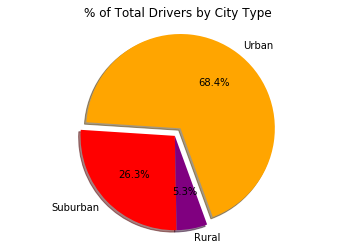

In [8]:
# Calculate Driver Percents

df50 = city_ride.groupby('city').driver_count.max()
df70 = city_ride.groupby('type').driver_count.count()

# Build Pie Charts

df75 = city_ride.driver_count.count()
df70


df80= df70.loc['Urban']
df81= df70.loc['Suburban']
df82= df70.loc['Rural']

urban_percentrs = (df80/df75)*100
sur_percentrs = (df81/df75)*100
ru_percentrs =  (df82/df75)*100

y3 = [urban_percentrs,
sur_percentrs,
ru_percentrs]

colors = ["orange","red","purple"]

type = ["Urban", "Suburban", "Rural"]


explode = (0.1,0,0)


 
plt.pie(y3, explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)

plt.axis("equal")

plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure


In [9]:
# Show Figure
